In [12]:
# Repite el ejercicio 5.1. considerando la variable categórica

In [14]:
# Apartado a)
import pandas as pd

# Comenzamos cargando el dataset
housing = pd.read_csv('datasets/housing/housing.csv')

print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [16]:
# Es necesario definir una variable indicadora para la variable categórica 'ocean_proximity', a la que se llamará 'ocean_cat'.

ocean_cat = housing[['ocean_proximity']]
ocean_cat

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [18]:
header_ocean_cat = housing['ocean_proximity'].unique() # Saca todos los posibles valores de la variable categórica
header_ocean_cat

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [20]:
from sklearn.preprocessing import OneHotEncoder # Para crear variable indicadora

indicador_var = OneHotEncoder(sparse_output=False) 
# Se crea una matriz con cinco columnas y 20640 filas. Cada columna corresponde a uno de los cinco posibles valores para 'ocean_proximity'. Se asigna
# un 1 al valor que toma y un cero al resto de posibles valores.
ocean_indicadora = indicador_var.fit_transform(ocean_cat) 
print(ocean_indicadora)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [21]:
ocean_df = pd.DataFrame(ocean_indicadora, columns=header_ocean_cat, index=housing.index) # Se guarda la matriz en un dataframe
ocean_df

,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [22]:
print(ocean_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NEAR BAY    20640 non-null  float64
 1   <1H OCEAN   20640 non-null  float64
 2   INLAND      20640 non-null  float64
 3   NEAR OCEAN  20640 non-null  float64
 4   ISLAND      20640 non-null  float64
dtypes: float64(5)
memory usage: 806.4 KB
None


In [23]:
# Antes de construir el modelo de regresión, se debe repetir el proceso de imputación y estandarización de las variables numéricas, como se hizo en 
# ejercicio 5.1., pero ahora añadiendo la variable categórica en dicho proceso. 

# Para combinar imputación y estandarización
from sklearn.pipeline import Pipeline

# Para realizar la imputación se carga la clase SimpleImputer
from sklearn.impute import SimpleImputer

# Para realizar estandarización
from sklearn.preprocessing import StandardScaler

# Para considerar la variable categórica en la imputación y estandarización
from sklearn.compose import ColumnTransformer

# Se separa la variable respuesta de las variables predictoras
respuesta = housing['median_house_value']
housing = housing.drop('median_house_value', axis=1) # Se elimina del dataframe la columna (axis=1) correspondiente a la variable respuesta

# Para que la imputación no de error se elimina la variable categórica (no numérica)
housing_num = housing.drop('ocean_proximity', axis=1)

# Imputación y estandarización de las variables numéricas
num_pipeline = Pipeline([
    ('imputador', SimpleImputer(strategy='median')),
    ('std_scalrer', StandardScaler())
                        ])

num_attribs = list(housing_num) # Se crea una lista con los nombres de las variables numéricas
cat_attribs = ['ocean_proximity'] # Se crea una lista con los nombres de las variables categóricas

# Se añade la variable categórica al proceso de imputación y estandarización
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

In [24]:
# Se ha divido el dataset entre variables numéricas y variables categóricas (que se han tratado mediante indicadores) y se ha llevado a cabo la 
# imputación y la posterior estandarización mediante la clase Pipeline. Los resultados se guardan en el array 'housing_prepared'.
# Ya se puede construir el modelo de regresión.
from sklearn.linear_model import LinearRegression

lm2 = LinearRegression()
lm2.fit(housing_prepared, respuesta)
print('Ordenada en el origen:', lm2.intercept_)
print('Componentes del vector normal del hiperplano;', lm2.coef_)

Ordenada en el origen: 242709.13524913645
Componentes del vector normal del hiperplano; [-52952.95152846 -53767.62485624  13312.88334575 -10320.06092603
  29920.76507621 -44490.47744263  29746.22226671  73636.15586366
 -23472.13460582 -63238.53335023 132593.58521653 -27169.53626692
 -18713.38099356]


In [28]:
# Nótese que hay cinco componentes más que con respecto al ejercicio 5.1. del vector normal al hiperplano, que corresponden a las cinco variables
# categóricas
len(lm2.coef_)

13

In [31]:
# Apartado b)
# Se procede igual que en el apartado b) del ejercicio 5.1.
import statsmodels.api as sm
from scipy import stats

X = housing_prepared
y = respuesta
X2 = sm.add_constant(X) # Se añade el parámetro correspondiente a la ordenada en el origen
est = sm.OLS(y,X2) # Se vuelve a construir el modelo empleando la librería statsmodels.api
est = est.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3129.
Date:                Thu, 09 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:16:17   Log-Likelihood:            -2.5917e+05
No. Observations:               20640   AIC:                         5.184e+05
Df Residuals:                   20627   BIC:                         5.185e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.023e+05   5147.569     39.292      0.0

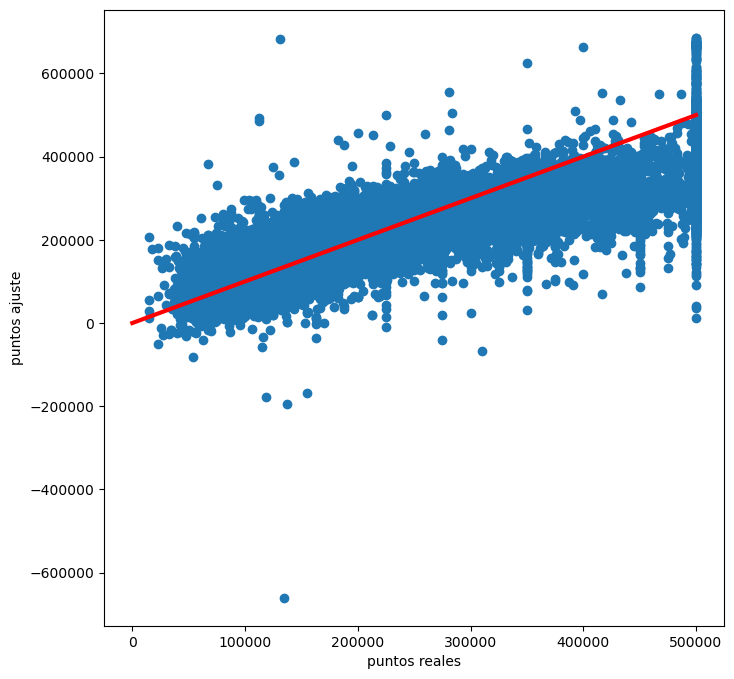

In [33]:
# Todas las variables predictoras son estadísticamente significativas porque el p.valor obtenido es siempre inferior a 0.05.
# Los coeficientes de determinación y de determinación ajustado son práticamente inguales porque el número de observaciones es mucho mayor que el
# número de variables.
# A continuación, se representan los valores predichos frente a los reales.
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
y_pred = lm2.predict(housing_prepared)
plt.scatter(y,y_pred)
plt.xlabel('puntos reales')
plt.ylabel('puntos ajuste')
plt.plot([0, max(y)],[0, max(y)],color='red',linewidth=3)
plt.show()

In [34]:
# Apartado c)
# Obtenemos las medianas de las variables numéricas. Es importante hallar las medianas DESPUÉS de haber aplicado pipeline()
# Se aplica el pipeline sobre las variables numéricas
housing_num_tr = num_pipeline.fit_transform(housing_num)

import numpy as np
medianas = np.median(housing_num_tr, axis=0)
print(medianas)

[ 0.53891366 -0.6422871   0.02864572 -0.23321042 -0.24283094 -0.22913175
 -0.23681619 -0.17679508]


In [35]:
# Vamos ahora con las variables categóricas
print(housing['ocean_proximity'].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [36]:
# El valor más repetido es '<1H OCEAN', que se puede incluir en el intercepto del modelo y reducir en uno el número de componentes normales al hiperplano
# Para ello se vuelve a contruir 'housing_prepared', incluyendo drop='first' como argumento de OneHotEncoder.
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(drop='first'), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)
lm2 = LinearRegression()
lm2.fit(housing_prepared, respuesta)
print('Ordenada en el origen:', lm2.intercept_)
print('Componentes del vector normal del hiperplano;', lm2.coef_)
print('Número de componentes:', len(lm2.coef_))

Ordenada en el origen: 219237.00064331223
Componentes del vector normal del hiperplano; [-52952.95152846 -53767.62485624  13312.88334575 -10320.06092603
  29920.76507621 -44490.47744263  29746.22226671  73636.15586366
 -39766.3987444  156065.71982235  -3697.40166109   4758.75361226]
Número de componentes: 12


In [165]:
# Se observa como son ahora 12 las componentes del vector normal

# La moda es la mediana de las desviaciones en valor absoluto de las observaciones con respecto de la mediana. Como las variables indicadoras valen, 
# o bien 0 o bien 1, la moda de todas las variables será 0 excepto de la más frecuente, que valdrá 1. La más frecuente es la que se incluye en el
# intercepto. Por lo tanto, se toman como 0 los valores para las variables indicadoras x9, x10, x11 y x12.
array_medianas = np.array(medianas)
x_nueva = np.append(array_medianas, [0,0,0,0])
x2 = x_nueva.reshape(1,-1)
y_nueva = lm2.predict(x2)
print('El, valor de y predicho es: ', y_nueva, 'dólares.')

El, valor de y predicho es:  [210887.88263401] dólares.
